In [4]:
import pandas as pd
import censusdata
import os
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import datetime 

#from google.colab import drive 
#drive.mount('/content/drive')

warnings.filterwarnings("ignore")

plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font


In [5]:
# Import the functions from another file (needs to be in the same directory)
from ipynb.fs.full.Functions_Activity_Plots import *

In [6]:
os.chdir('/Users/sayaz/Documents/BEAM/BEAM CORE Validation/Austin/20230404')


In [4]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [5]:
####################################------------- LOAD THE DATA -------------####################################

In [6]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [7]:
# Use actSim for ActivitySim, nhts for 2017 NHTS data, and events file for BEAM output

In [8]:
#----------------------------------------------- NHTS DATA -----------------------------------------------

In [8]:
# 2017 NHTS survey data public
nhts = read_csv('/Users/sayaz/Documents/BEAM/BEAM CORE Validation/NHTS/csv/trippub.csv')
print(nhts.shape[0]) # 923572

923572


In [9]:
# Keep only the weekday trips
# print(nhts_sfbay['TDWKND'].unique())
nhts = nhts.loc[nhts['TDWKND']==2]
nhts.shape[0] # 709266

709266

In [11]:
#nhts Austin
nhts = nhts.loc[nhts['HHSTATE'] == 'TX']
nhts.shape[0] # AllDays = 147300

147300

In [14]:
nhts['WTTRDFIN'].describe()

count    147300.000000
mean     145161.424728
std      163608.878328
min       16795.230127
25%       46202.499233
50%       84790.947384
75%      172232.749509
max      923362.573390
Name: WTTRDFIN, dtype: float64

In [17]:
#---------------------------------------------- BEAM EVENTS FILE ----------------------------------------------

In [18]:
# Beam output: events file
# Source:
# https://s3.us-east-2.amazonaws.com/beam-outputs/index.html#pilates-outputs/sfbay_baseline_20230224/beam/year-2018-iteration-6/ITERS/it.0/

In [15]:
events = read_csv('Data/austin_20230404_beam_year-2020-iteration-2_ITERS_it.0_0.events.csv', compression='gzip') 
# To avoid error: UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1, used compression='gzip'
print(events.shape[0]) # 16797436

16797436


In [17]:
events['type'].unique()

# array(['ParkingEvent', 'departure', 'PersonEntersVehicle',
#        'PathTraversal', 'ModeChoice', 'actend', 'TeleportationEvent',
#        'arrival', 'actstart', 'LeavingParkingEvent', 'PersonCost',
#        'PersonLeavesVehicle', 'ReserveRideHail', 'Replanning',
#        'ChargingPlugInEvent', 'RefuelSessionEvent',
#        'ChargingPlugOutEvent'], dtype=object)

array(['ParkingEvent', 'departure', 'PersonEntersVehicle',
       'PathTraversal', 'ModeChoice', 'actend', 'LeavingParkingEvent',
       'PersonCost', 'PersonLeavesVehicle', 'arrival', 'actstart',
       'TeleportationEvent', 'ReserveRideHail', 'Replanning',
       'ChargingPlugInEvent', 'RefuelSessionEvent',
       'ChargingPlugOutEvent'], dtype=object)

In [22]:
#--------------------------------------- ACTIVITYSIM 'final_trips' FILE ---------------------------------------

In [18]:
# ActivitySim output: final_trips
# Source:
# https://s3.us-east-2.amazonaws.com/beam-outputs/index.html#pilates-outputs/sfbay_baseline_20230224/
# activitysim/year-2018-iteration-6/

actSim = read_csv('Data/austin_20230404_activitysim_final_trips.csv')
print(actSim.shape[0]) # 1007990

print(actSim.columns.tolist())
# ['trip_id', 'person_id', 'household_id', 'tour_id', 'primary_purpose', 'trip_num', 'outbound', 'trip_count', 
#  'purpose', 'destination', 'origin', 'destination_logsum', 'depart', 'trip_mode', 'mode_choice_logsum']

1007990
['trip_id', 'person_id', 'household_id', 'tour_id', 'primary_purpose', 'trip_num', 'outbound', 'trip_count', 'purpose', 'destination', 'origin', 'destination_logsum', 'depart', 'trip_mode', 'mode_choice_logsum']


In [24]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [25]:
##################################------------- GENERATE THE PLOTS -------------##################################

In [26]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
#******************************************************************************************************************

In [28]:
#================================================== TRIP MODE ==================================================

In [29]:
#-------------------------------------------------- NHTS Mode --------------------------------------------------

In [26]:
nhts['TRPTRANS'].unique()
nhts_mode_list = nhts['TRPTRANS'].unique()
nhts_mode_list.sort()
nhts_mode_list
# array([11,  5,  3,  6,  1, 13,  2,  4, 15, 18, 17,  8, 16, 20, 97, 19,  9,
#        12, 10,  7, 14])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 97])

In [31]:
# 1:Walk, 2:Bicycle, 
# 3:Car, 4:SUV, 5:Van, 6:Pickup truck, 
# 7:Golf cart/Segway, 8:Motorcycle/Moped, 
# 9:RV (motor home, ATV, snowmobile), 10:School bus, 11:Public or commuter bus, 12:Paratransit/Dial-a-ride, 
# 13:Private/Charter/Tour/Shuttle bus, 14:City-to-city bus (Greyhound, Megabus), 15:Amtrak/Commuter rail,
# 16:Subway/elevated/light rail/street car, 17:Taxi/limo (including Uber/Lyft), 18:Rental car (Including Zipcar/Car2Go)  
# 19:Airplane, 20:Boat/ferry/water taxi, 97:Something Else, -7:I prefer not to answer, -8:I don't know, -9: Not ascertained 

# Remove cells with values: 19,-7,-8,-9,97

In [27]:
mode_list = [1,2,3,4,5,6,7,8,10,11,14,15,16,17,20]
nhts_mode = nhts.loc[nhts['TRPTRANS'].isin(mode_list)]
print(str(nhts_mode.shape[0])) # 145458

145458


In [28]:
N_Persons_on_trip = nhts_mode['NUMONTRP'].unique()
N_Persons_on_trip.sort()
N_Persons_on_trip

# array([ 1,  2,  3,  4,  6,  5,  7, 11,  8,  9, 30, 13, 21, 28, 26, 12, 10,
#        16])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  28,
        31,  36,  37,  38,  40,  41,  43,  46,  48,  49,  51,  56,  57,
        61,  91, 100])

In [33]:
# remove the first 2 items from the array
rest = N_Persons_on_trip[2:]
rest

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  28,  31,  36,
        37,  38,  40,  41,  43,  46,  48,  49,  51,  56,  57,  61,  91,
       100])

In [34]:
# NHTS mode list generalized
nhts_mode.loc[nhts_mode['TRPTRANS'] == 1, 'Mode'] = 'Walk'
nhts_mode.loc[nhts_mode['TRPTRANS'].isin([2,7,8]), 'Mode'] = 'Bike'
nhts_mode.loc[(nhts_mode['TRPTRANS'].isin([3,4,5,6]) & nhts_mode['NUMONTRP']==1), 'Mode'] = 'Drive Alone'
nhts_mode.loc[(nhts_mode['TRPTRANS'].isin([3,4,5,6]) & nhts_mode['NUMONTRP']==2), 'Mode'] = 'Shared 2 Persons'
nhts_mode.loc[(nhts_mode['TRPTRANS'].isin([3,4,5,6]) & nhts_mode['NUMONTRP'].isin(rest)), 'Mode'] = 'Shared 3+ Persons'
nhts_mode.loc[nhts_mode['TRPTRANS'] == 17, 'Mode'] = 'Taxi/TNC'
nhts_mode.loc[nhts_mode['TRPTRANS'].isin([10, 11, 14, 15,16,20]), 'Mode'] = 'Public transit' 

print(nhts_mode['Mode'].unique())
print(str(nhts_mode.shape[0])) 

# ['Public transit' 'Drive Alone' 'Shared 2 Persons' 'Walk' 'Bike'
#  'Shared 3+ Persons' 'Taxi/TNC']
# 17099

['Shared 2 Persons' 'Shared 3+ Persons' 'Drive Alone' 'Walk'
 'Public transit' 'Bike' 'Taxi/TNC']
145458


In [36]:
nhts_mode_wt = nhts_mode.groupby('Mode')[['WTTRDFIN']].sum()

In [37]:
nhts_mode_wt

,WTTRDFIN
Mode,
Bike,1.975584e+08
Drive Alone,9.061900e+09
Public transit,9.005284e+08
Shared 2 Persons,5.065155e+09
Shared 3+ Persons,4.368514e+09
Taxi/TNC,5.427403e+07
Walk,1.463073e+09


In [38]:
nhts_mode_wt_percent = nhts_mode_wt['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_mode_wt_percent = nhts_mode_wt_percent.reset_index()
nhts_mode_wt_percent

,Mode,WTTRDFIN
0,Bike,0.935808
1,Drive Alone,42.925010
2,Public transit,4.265683
3,Shared 2 Persons,23.992961
4,Shared 3+ Persons,20.693067
5,Taxi/TNC,0.257089
6,Walk,6.930382


In [29]:
#-------------------------------------------------- BEAM Mode --------------------------------------------------

In [30]:
##### Use 'type' = 'ModeChoice' to generate the plots for mode type and trip length #####

In [39]:
events_type_mode_length = events.loc[events['type'] == 'ModeChoice']
print(str(events_type_mode_length.shape[0])) # 1025900
# print(str(round(events_type_mode_length.shape[0]/events.shape[0]*100, 2))  + ' % of the data') # 6.86 % of the data

1025900


In [41]:
events_type_mode_length['mode'].unique()

# array(['car_hov3', 'car', 'hov3_teleportation', 'hov2_teleportation',
#        'car_hov2', 'walk', 'bike', 'walk_transit', 'ride_hail',
#        'ride_hail_pooled', 'drive_transit', 'bike_transit'], dtype=object)

array(['hov3_teleportation', 'car', 'hov2_teleportation', 'walk', 'bike',
       'car_hov2', 'car_hov3', 'walk_transit', 'ride_hail',
       'ride_hail_pooled', 'drive_transit', 'bike_transit'], dtype=object)

In [34]:
# Beam mode list generalized

# Need to remove 'hov2_teleportation'and 'hov3_teleportation' since teleportation is not available in the NHTS data

# Keep only the following modes:
# 'car_hov2', 'car', 'car_hov3', 'bike', 'walk', 'walk_transit', 'ride_hail','ride_hail_pooled', 'drive_transit', 
# 'bike_transit'        
# events_mode = events_type_mode_length.loc[events_type_mode_length['mode'].isin(['car_hov2', 'car', 'car_hov3', 
# 'bike', 'walk', 'walk_transit', 'ride_hail','ride_hail_pooled', 'drive_transit', 'bike_transit' ])]

# print(str(events_mode.shape[0])) # 2097966

In [42]:
events_mode = events_type_mode_length

In [43]:
events_mode.loc[events_mode['mode'] == 'walk', 'Mode'] = 'Walk'
events_mode.loc[events_mode['mode'] == 'bike', 'Mode'] = 'Bike'
events_mode.loc[events_mode['mode'].isin(['car']), 'Mode'] = 'Drive Alone'
events_mode.loc[events_mode['mode'].isin(['car_hov2', 'hov2_teleportation']), 'Mode'] = 'Shared 2 Persons'
events_mode.loc[events_mode['mode'].isin(['car_hov3', 'hov3_teleportation']), 'Mode'] = 'Shared 3+ Persons'
events_mode.loc[events_mode['mode'].isin(['ride_hail', 'ride_hail_pooled']), 'Mode'] = 'Taxi/TNC'
events_mode.loc[events_mode['mode'].isin(['walk_transit', 'drive_transit', 'bike_transit']), 'Mode'] = 'Public transit' 

events_mode['Mode'].unique()
# array(['Shared 3+ Persons', 'Drive Alone', 'Shared 2 Persons', 'Walk',
#        'Bike', 'Public transit', 'Taxi/TNC'], dtype=object)

array(['Shared 3+ Persons', 'Drive Alone', 'Shared 2 Persons', 'Walk',
       'Bike', 'Public transit', 'Taxi/TNC'], dtype=object)

In [37]:
# Beam mode list generalized for all 'type' field
# events_mode.loc[events_mode['mode'] == 'walk', 'Mode'] = 'Walk'
# events_mode.loc[events_mode['mode'] == 'bike', 'Mode'] = 'Bike'
# events_mode.loc[events_mode['mode'].isin(['car_hov2', 'car',
#        'hov2_teleportation', 'car_hov3', 'hov3_teleportation']), 'Mode'] = 'Car'
# events_mode.loc[events_mode['mode'].isin(['ride_hail', 'ride_hail_pooled']), 'Mode'] = 'Taxi/TNC'
# events_mode.loc[events_mode['mode'].isin(['bus', 'tram', 'subway', 'rail', 'walk_transit', 'drive_transit', 'bike_transit', 'cable_car',
#        'ferry']), 'Mode'] = 'Public transit' 


# events_mode['Mode'].unique()
#array(['Public transit', 'Car', 'Walk', 'Bike', 'Taxi/TNC'], dtype=object)

In [44]:
events_mode_percent = events_mode.groupby('Mode')[['tripId']].count()

In [45]:
events_mode_percent['BEAM'] = events_mode_percent['tripId'].transform(lambda x: x / x.sum() * 100)
events_mode_percent = events_mode_percent.reset_index()
events_mode_percent

,Mode,tripId,BEAM
0,Bike,11605,1.131202
1,Drive Alone,550990,53.707964
2,Public transit,30292,2.952724
3,Shared 2 Persons,211043,20.571498
4,Shared 3+ Persons,152228,14.838483
5,Taxi/TNC,32181,3.136855
6,Walk,37561,3.661273


In [40]:
# events_mode_percent['BEAM (' + str(events_mode.shape[0]) + ' ' + 'trips)'] = events_mode_percent['tripId'].transform(lambda x: x / x.sum() * 100)

In [41]:
#---------------------------------------------- ActivitySim Mode ----------------------------------------------

In [46]:
actSim['trip_mode'].unique()

array(['SHARED2PAY', 'DRIVEALONEPAY', 'DRIVEALONEFREE', 'WALK',
       'SHARED2FREE', 'SHARED3FREE', 'SHARED3PAY', 'TNC_SHARED',
       'TNC_SINGLE', 'BIKE', 'WALK_LOC', 'TAXI', 'DRIVE_LOC', 'WALK_LRF',
       'DRIVE_LRF'], dtype=object)

In [47]:
# Romove rows with missing values in the trip_mode field
actSim_mode = actSim.dropna(subset = 'trip_mode')
print(actSim_mode.shape[0]) # 1007990; same as actSim, no missing value

1007990


In [48]:
# Create a field to specify the list of modes for validation
# ActivitySim mode list generalized

actSim_mode.loc[actSim_mode['trip_mode'] == 'WALK', 'Mode'] = 'Walk'
actSim_mode.loc[actSim_mode['trip_mode'] == 'BIKE', 'Mode'] = 'Bike'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['DRIVEALONEPAY', 'DRIVEALONEFREE']), 'Mode'] = 'Drive Alone'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['SHARED2PAY', 'SHARED2FREE']), 'Mode'] = 'Shared 2 Persons'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['SHARED3FREE', 'SHARED3PAY']), 'Mode'] = 'Shared 3+ Persons'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['TNC_SHARED', 'TAXI', 'TNC_SINGLE']), 'Mode'] = 'Taxi/TNC'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['WALK_HVY', 'WALK_LOC','WALK_LRF', 'DRIVE_LOC', 'DRIVE_HVY', 'WALK_COM', 'DRIVE_LRF', 'DRIVE_COM']), 'Mode'] = 'Public transit' 

print(actSim_mode['Mode'].unique())
# ['Shared 3+ Persons' 'Drive Alone' 'Taxi/TNC' 'Walk' 'Public transit'
#  'Shared 2 Persons' 'Bike']

['Shared 2 Persons' 'Drive Alone' 'Walk' 'Shared 3+ Persons' 'Taxi/TNC'
 'Bike' 'Public transit']


In [49]:
actSim_mode_percent = actSim_mode.groupby('Mode')[['trip_id']].count()
actSim_mode_percent

,trip_id
Mode,
Bike,10985
Drive Alone,511227
Public transit,38358
Shared 2 Persons,217281
Shared 3+ Persons,155776
Taxi/TNC,33097
Walk,41266


In [50]:
actSim_mode_percent['ActivitySim'] = actSim_mode_percent['trip_id'].transform(lambda x: x / x.sum() * 100)
actSim_mode_percent = actSim_mode_percent.reset_index()
actSim_mode_percent.columns

Index(['Mode', 'trip_id', 'ActivitySim'], dtype='object')

In [51]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [53]:
actSim_mode_percent = actSim_mode_percent[['Mode', 'ActivitySim']]
events_mode_percent = events_mode_percent[['Mode', 'BEAM']]
nhts_mode_wt_percent = nhts_mode_wt_percent[['Mode', 'WTTRDFIN']]

In [54]:
trip_mode_validation = pd.merge(actSim_mode_percent, events_mode_percent,  
                                on = 'Mode', how = 'left')

In [56]:
trip_mode_validation = pd.merge(trip_mode_validation, nhts_mode_wt_percent, 
                                on = 'Mode', how = 'left')

In [57]:
trip_mode_validation

,Mode,ActivitySim,BEAM,WTTRDFIN
0,Bike,1.089793,1.131202,0.935808
1,Drive Alone,50.717467,53.707964,42.925010
2,Public transit,3.805395,2.952724,4.265683
3,Shared 2 Persons,21.555869,20.571498,23.992961
4,Shared 3+ Persons,15.454122,14.838483,20.693067
5,Taxi/TNC,3.283465,3.136855,0.257089
6,Walk,4.093890,3.661273,6.930382


In [59]:
trip_mode_validation.to_csv('Summary Table/trip_mode_validation.csv')

In [53]:
# trip_mode_validation.plot(x = 'Mode', kind = 'bar')
# plt.ylabel('Percent of modes')
# plt.title('Trip Mode Distribution')
# plt.savefig('Plot/Trip_Mode_Validation.png', dpi = 200, bbox_inches = 'tight')

In [60]:
# LEGEND
ActSim_legend_mode = 'ActivitySim (N = ' + str(actSim_mode.shape[0]) + ' ' + 'trips)'
BEAM_legend_mode = 'BEAM (N = ' + str(events_mode.shape[0]) + ' ' + 'trips)'
nhts_legend_mode = 'NHTS (N = ' + str(nhts_mode.shape[0]) + ' ' + 'trips)'
legend_mode = [ActSim_legend_mode, BEAM_legend_mode, nhts_legend_mode]

<AxesSubplot: title={'center': 'Trip Mode Distribution (Weekdays)'}, xlabel='Mode', ylabel='Percent of trips'>

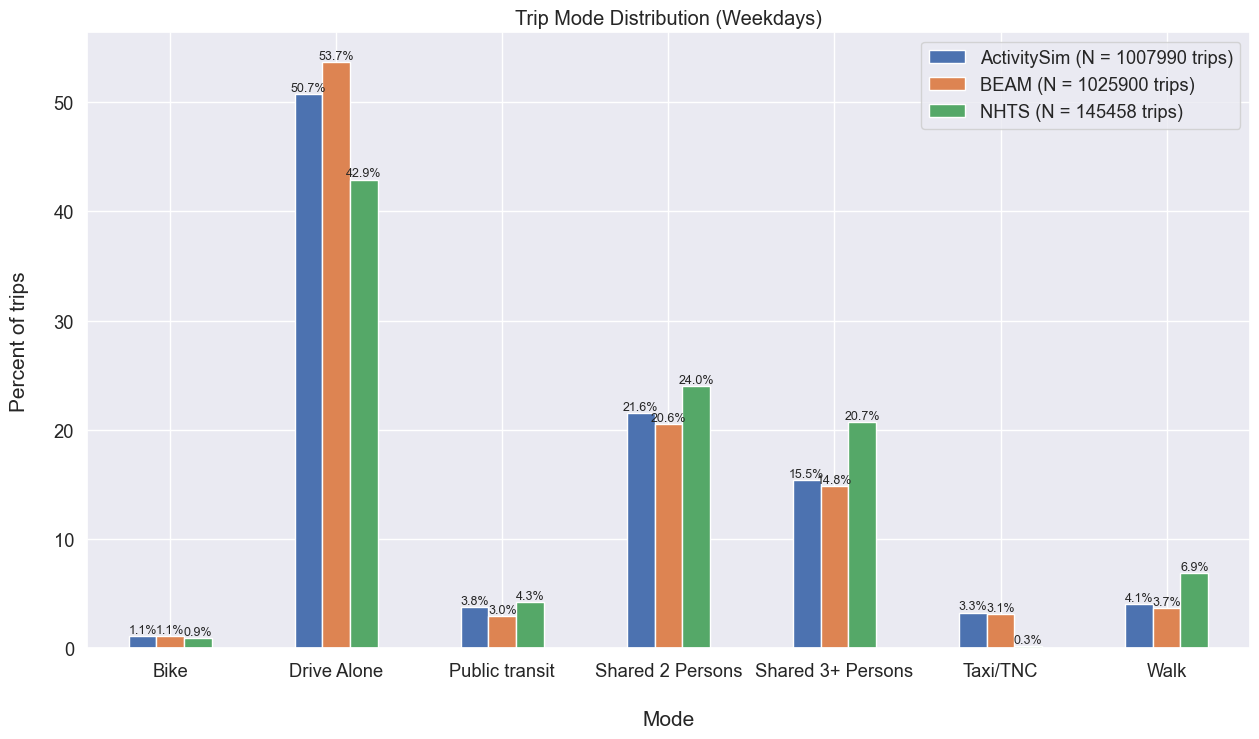

In [61]:
activity_plot_percentLegend(trip_mode_validation, 'Mode', 'Mode', 'Percent of trips', legend_mode, 'Trip Mode Distribution (Weekdays)', 
                         'Plot/Trip_Mode_Validation.png')

In [611]:
# activity_plot_showPercent(trip_mode_validation, 'Mode', 'Mode', 'Percent of trips', 'Trip Mode Distribution (Weekdays)', 
#                          'Plot/Trip_Mode_Validation.png')

In [ ]:
#******************************************************************************************************************

In [ ]:
#=============================================== TRIP LENGTH ===============================================

In [56]:
#----------------------------------------------- NHTS Length -----------------------------------------------

In [62]:
nhts['TRPMILES'].unique()

# array([15.056,  5.26 , 20.409, ..., 10.248,  5.877,  4.044])

array([60.357,  1.352,  1.358, ..., 34.698, 13.385, 10.45 ])

In [63]:
nhts['TRPMILES'].min() #-9.0

-9.0

In [64]:
nhts['TRPMILES'].max() # 8701.108

6515.858

In [65]:
# Remove the 'TRPMILES' < 0 values
nhts_length = nhts[nhts['TRPMILES'] >= 0]

In [66]:
print(nhts_length['TRPMILES'].min()) # 0.0
print(nhts_length['TRPMILES'].max()) # 8701.108

0.0
6515.858


In [68]:
nhts_length.loc[ (nhts_length['TRPMILES'] >= 0) & (nhts_length['TRPMILES'] < 5), 'Trip length' ] = '1' 
nhts_length.loc[ (nhts_length['TRPMILES'] >= 5) & (nhts_length['TRPMILES'] < 10), 'Trip length' ] = '2' 
nhts_length.loc[ (nhts_length['TRPMILES'] >= 10) & (nhts_length['TRPMILES'] < 15), 'Trip length' ] = '3' 
nhts_length.loc[ (nhts_length['TRPMILES'] >= 15) & (nhts_length['TRPMILES'] < 20), 'Trip length' ] = '4' 
nhts_length.loc[ nhts_length['TRPMILES'] >= 20, 'Trip length' ] = '5' 

nhts_length['Trip length'].unique()
# array(['>= 5, < 10 miles', '>= 20 miles', '>= 0, < 5 miles',
#        '>= 10, < 15 miles', '>= 15, < 20 miles'], dtype=object)

array(['5', '1', '3', '2', '4'], dtype=object)

In [69]:
nhts_length_wt = nhts_length.groupby('Trip length')[['WTTRDFIN']].sum()

In [70]:
nhts_length_wt

,WTTRDFIN
Trip length,
1,1.297267e+10
2,3.611594e+09
3,1.767202e+09
4,1.010541e+09
5,2.007430e+09


In [71]:
nhts_length_wt_percent = nhts_length_wt['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_length_wt_percent = nhts_length_wt_percent.reset_index()
nhts_length_wt_percent

,Trip length,WTTRDFIN
0,1,60.706643
1,2,16.900749
2,3,8.269766
3,4,4.728911
4,5,9.393932


In [65]:
# nhts_sfbay_length_wt_percent = nhts_sfbay_length_wt_percent.rename(columns = {'WTTRDFIN':'NHTS'})

In [66]:
#----------------------------------------------- BEAM Length -----------------------------------------------

In [72]:
# Trip length
events_type_mode_length['length'].unique()

array([ 2196.887     ,   450.551     , 38090.647     , ...,
       74840.44229549, 30453.95479952, 49118.268     ])

In [73]:
# Drop nan values from 'length' column
events_length = events_type_mode_length.dropna(subset = 'length')

In [74]:
events_length['length'].unique()

array([ 2196.887     ,   450.551     , 38090.647     , ...,
       74840.44229549, 30453.95479952, 49118.268     ])

In [75]:
# I think the unit is in meter; In the analyze_events.py file length is divided by 1609.34 to get miles
# Link to file: https://github.com/LBNL-UCB-STI/beam/blob/develop/src/main/python/events_analysis/analyze_events.py

print(events_type_mode_length['length'].min()) #0.001
print(events_type_mode_length['length'].max()) #289497.12684523995

0.001
289497.12684523995


In [71]:
# print(events.shape[0]) #36644243
# print(events_length.shape[0]) #11581761

In [76]:
# Create a column to convert length from meters to mile to match with the nhts unit
events_length['length_mile'] = events_length['length']/1609.34

In [77]:
print(events_length['length_mile'].min()) # .213727366498068e-07
print(events_length['length_mile'].max()) # 179.885621960083

6.213727366498068e-07
179.885621960083


In [78]:
events_length.loc[ (events_length['length_mile'] >= 0) & (events_length['length_mile'] < 5), 'Trip length' ] = '1' 
events_length.loc[ (events_length['length_mile'] >= 5) & (events_length['length_mile'] < 10), 'Trip length' ] = '2' 
events_length.loc[ (events_length['length_mile'] >= 10) & (events_length['length_mile'] < 15), 'Trip length' ] = '3' 
events_length.loc[ (events_length['length_mile'] >= 15) & (events_length['length_mile'] < 20), 'Trip length' ] = '4' 
events_length.loc[ events_length['length_mile'] >= 20, 'Trip length' ] = '5' 

In [79]:
events_length['Trip length'].unique()
# array(['>= 0, < 5 miles', '>= 10, < 15 miles', '>= 5, < 10 miles',
#        '>= 20 miles', '>= 15, < 20 miles'], dtype=object)

array(['1', '5', '2', '3', '4'], dtype=object)

In [80]:
## Plot for trip length all modes

In [81]:
events_length_percent = distribution(events_length, 'Trip length', 'tripId', 'BEAM')
events_length_percent

,Trip length,BEAM
0,1,45.839361
1,2,24.962764
2,3,13.137830
3,4,7.086363
4,5,8.973682


In [78]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [83]:
merged_length = merge_df(events_length_percent, nhts_length_wt_percent, 'Trip length')
merged_length

,Trip length,BEAM,WTTRDFIN
0,1,45.839361,60.706643
1,2,24.962764,16.900749
2,3,13.137830,8.269766
3,4,7.086363,4.728911
4,5,8.973682,9.393932


In [80]:
# merged_length = merged_length.rename(columns = {'BEAM (2512933 trips)': 'BEAM (2,512,933 trips)'})

In [84]:
merged_length.to_csv('Summary Table/trip_length_validation_all_modes.csv')

In [82]:
# NHTS_no_of_trips = nhts_sfbay_length[['WTTRDFIN']].count()
# NHTS_no_of_trips


In [85]:
BEAM_legend_length = 'BEAM (N = ' + str(events_length.shape[0]) + ' ' + 'trips)'
nhts_legend_length = 'NHTS (N = ' + str(nhts_length.shape[0]) + ' ' + 'trips)'
legend_length = [BEAM_legend_length, nhts_legend_length]

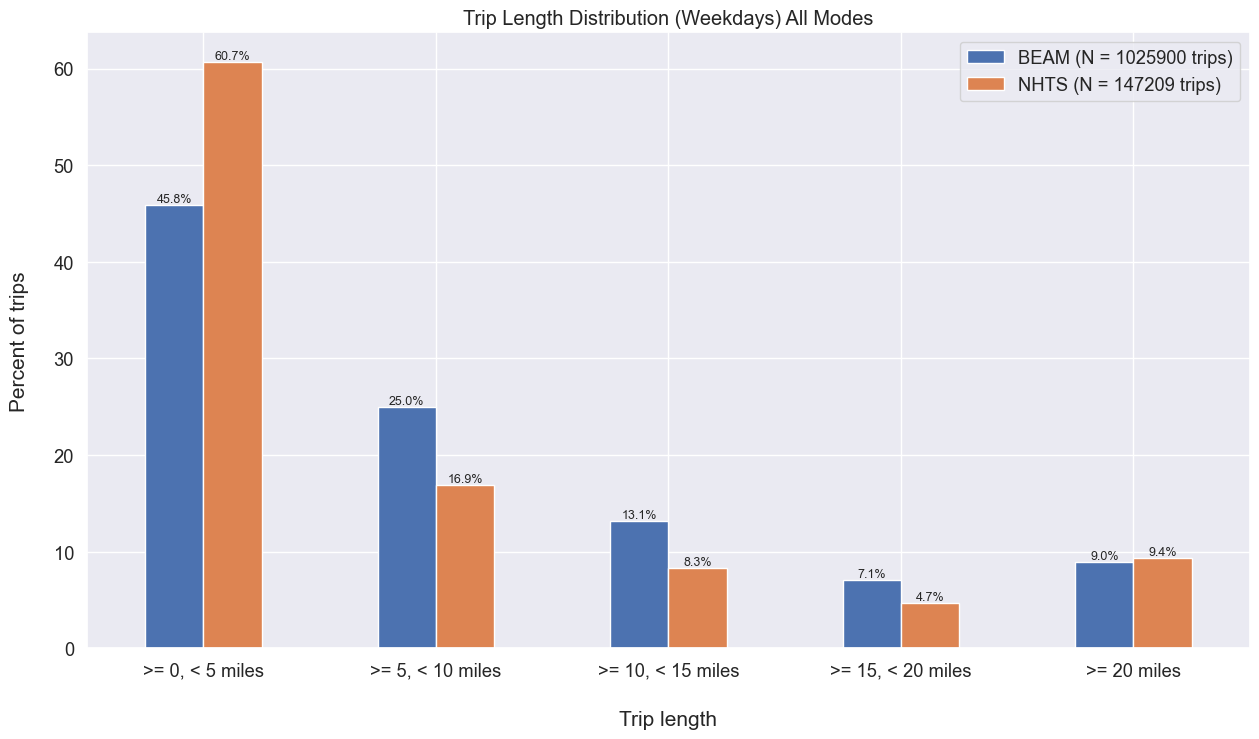

In [86]:
df = merged_length
xtickLabels = ['>= 0, < 5 miles', '>= 5, < 10 miles', '>= 10, < 15 miles', '>= 15, < 20 miles', '>= 20 miles']
df_plot = df.plot('Trip length', kind = 'bar', figsize=(15,8)) # , figsize=(15,4) , width=1
for p in df_plot.containers:
    df_plot.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize = 9)
    df_plot.xaxis.set_label_coords(0.5, -0.1)
    df_plot.yaxis.set_label_coords(-0.05, 0.5)
    df_plot.set_xticklabels(xtickLabels)
    df_plot.legend(legend_length)
plt.xlabel('Trip length', fontsize = 15)
plt.ylabel('Percent of trips', fontsize = 15)
plt.xticks(rotation = 360)
plt.title('Trip Length Distribution (Weekdays) All Modes')
plt.savefig('Plot/Trip_Length_Validation.png', dpi = 200, bbox_inches = 'tight') # plt.savefig(plotname, dpi = 200, bbox_inches = 'tight')
plt.show()

In [591]:
# activity_plot_showPercent(merged_length, 'Trip length', 'Trip length', 'Percent of trips', 'Trip Length Distribution (Weekdays) All Modes', 
#                          'Plot/Trip_Length_Validation.png')

In [ ]:
#******************************************************************************************************************

In [ ]:
#=========================================== TRIP LENGTH (CAR ONLY) ===========================================

In [56]:
#-------------------------------------------- NHTS Length (Car Only) --------------------------------------------

In [88]:
nhts_length_car = nhts_length.loc[nhts_length['TRPTRANS'].isin([3,4,5,6])]
nhts_length_car['Trip length'].shape[0] # 130613

130613

In [89]:
nhts_length_wt_car = nhts_length_wt.groupby('Trip length')[['WTTRDFIN']].sum()

In [90]:
nhts_length_wt_car

,WTTRDFIN
Trip length,
1,1.297267e+10
2,3.611594e+09
3,1.767202e+09
4,1.010541e+09
5,2.007430e+09


In [91]:
nhts_length_wt_car_percent = nhts_length_wt_car['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_length_wt_car_percent = nhts_length_wt_car_percent.reset_index()
nhts_length_wt_car_percent

,Trip length,WTTRDFIN
0,1,60.706643
1,2,16.900749
2,3,8.269766
3,4,4.728911
4,5,9.393932


In [92]:
#-------------------------------------------- BEAM Length (Car Only) --------------------------------------------

In [93]:
events_length_car = events_length.loc[events_length['mode'].isin(['car_hov2', 'car',
        'car_hov3'])]

In [94]:
# events_length_car = events_length.loc[events_length['mode'].isin(['car_hov2', 'car',
#        'hov2_teleportation', 'car_hov3', 'hov3_teleportation'])]

In [95]:
events_length_car['Trip length'].shape[0] # 730619

730619

In [96]:
events_length_percent_car = distribution(events_length_car, 'Trip length', 'tripId', 'BEAM ')
events_length_percent_car

,Trip length,BEAM
0,1,41.194521
1,2,25.993438
2,3,14.374934
3,4,7.980904
4,5,10.456202


In [97]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [99]:
merged_length_car = merge_df(events_length_percent_car, nhts_length_wt_car_percent, 'Trip length')
merged_length_car

,Trip length,BEAM,WTTRDFIN
0,1,41.194521,60.706643
1,2,25.993438,16.900749
2,3,14.374934,8.269766
3,4,7.980904,4.728911
4,5,10.456202,9.393932


In [100]:
# merged_length_car = merged_length_car.rename(columns = {'BEAM (1691815 trips)':'BEAM (1,691,815 trips)', 'WTTRDFIN':'NHTS (12,525 trips)'})

In [101]:
merged_length_car.to_csv('Summary Table/trip_length_validation_carnly.csv')

In [102]:
# LEGEND for the Plot
BEAM_legend_length_car = 'BEAM (N = ' + str(events_length_car.shape[0]) + ' ' + 'trips)'
nhts_legend_length_car = 'NHTS (N = ' + str(nhts_length_wt_car.shape[0]) + ' ' + 'trips)'
legend_length_car = [BEAM_legend_length, nhts_legend_length]

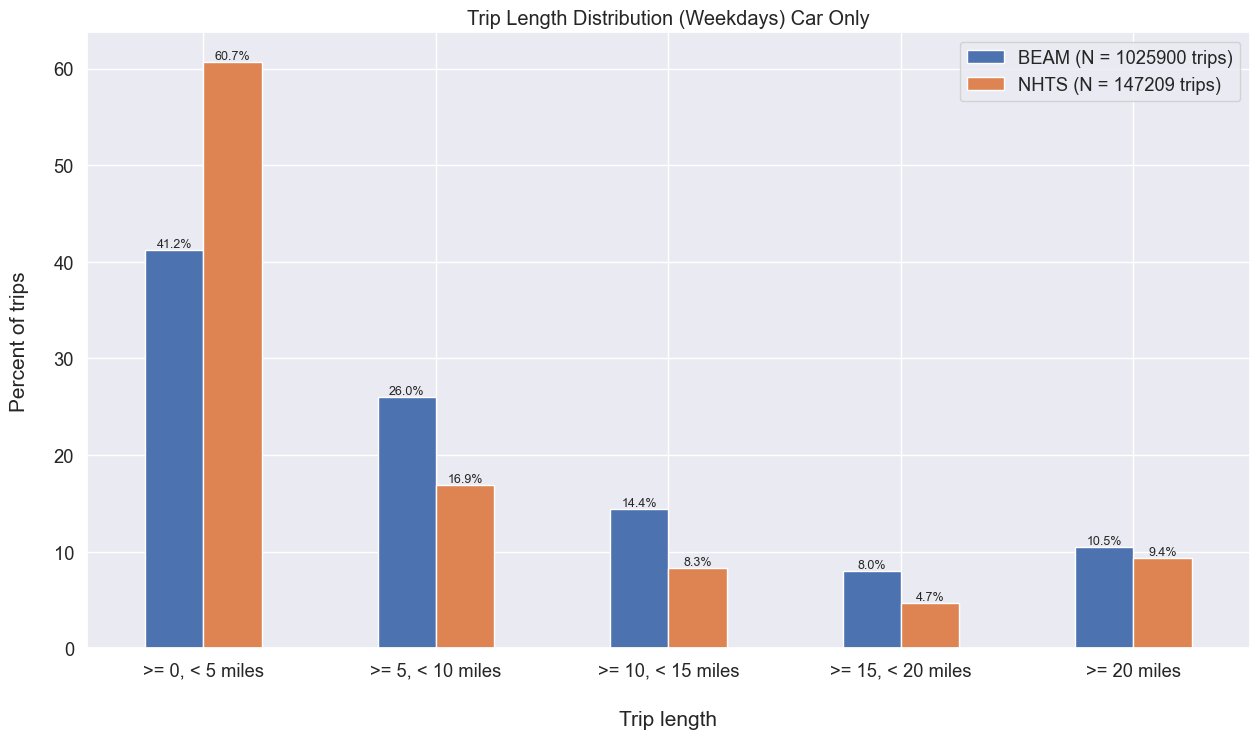

In [103]:
# Plot
df = merged_length_car
xtickLabels = ['>= 0, < 5 miles', '>= 5, < 10 miles', '>= 10, < 15 miles', '>= 15, < 20 miles', '>= 20 miles']
df_plot = df.plot('Trip length', kind = 'bar', figsize=(15,8)) # , figsize=(15,4) , width=1
for p in df_plot.containers:
    df_plot.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize = 9)
    df_plot.xaxis.set_label_coords(0.5, -0.1)
    df_plot.yaxis.set_label_coords(-0.05, 0.5)
    df_plot.legend(legend_length_car)
    df_plot.set_xticklabels(xtickLabels)
plt.xlabel('Trip length', fontsize = 15)
plt.ylabel('Percent of trips', fontsize = 15)
plt.xticks(rotation = 360)
plt.title('Trip Length Distribution (Weekdays) Car Only')
plt.savefig('Plot/Trip_Length_Validation_Car.png', dpi = 200, bbox_inches = 'tight') # plt.savefig(plotname, dpi = 200, bbox_inches = 'tight')
plt.show()

In [612]:
# activity_plot_showPercent(merged_length_car, 'Trip length', 'Trip length', 'Percent of trips', 'Trip Length Distribution (Weekdays) Car Only', 
#                          'Plot/Trip_Length_Validation_Car.png')

In [ ]:
#******************************************************************************************************************

In [ ]:
#================================================ DEPARTURE TIME ================================================

In [56]:
#---------------------------------------------- NHTS Departure Time ----------------------------------------------

In [104]:
# STRTTIME: Trip Start Time (HHMM)
nhts['STRTTIME'].min()
# 0

0

In [105]:
nhts['STRTTIME'].max()
# 2359

2359

In [102]:
# In ActivitySim, departeture time considered from 5.0 hr to 23.0 hr. 
# So, I will consider only those hrs for nhts data 

In [107]:
# Remove 0 to 5 hr from the nhts data
nhts_depart = remove_rows_by_values(nhts,'STRTTIME', list(range(0,500)))

In [108]:
nhts_depart['STRTTIME'].min()

500

In [105]:
# Create a new column in the df by replacing a range of values in an existing column by 
# one single value in the new column

# def replace_value_multiple(df, current_value_m, current_column_m, new_value_m,  new_column_m):
#     df.loc[df[current_column_m].isin(current_value_m), new_column_m] = new_value_m
#     return df  

In [109]:
current_value_m = [list(range(500,560)), list(range(600,660)), list(range(700,760)), list(range(800,860)), 
    list(range(900,960)), list(range(1000,1060)), list(range(1100,1160)), list(range(1200,1260)), list(range(1300,1360)), 
    list(range(1400,1460)), list(range(1500,1560)), list(range(1600,1660)), list(range(1700,1760)), list(range(1800,1860)), 
    list(range(1900,1960)), list(range(2000,2060)), list(range(2100,2160)), list(range(2200,2260)), list(range(2300,2360)) 
                  ]
# current_value_m[-1] 

In [110]:
new_value = pd.date_range("5:00", "23:59", freq="60min").strftime('%H:%M')
new_value

Index(['05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00',
       '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'],
      dtype='object')

In [112]:
# NHTS: create the 'Departure time' column for the plot
for cur_hr, new_val in zip(current_value_m, new_value):
    replace_value_multiple(nhts_depart, cur_hr, 'STRTTIME', new_val,  'Departure time') 

In [113]:
print(nhts_depart.columns.tolist())

['HOUSEID', 'PERSONID', 'TDTRPNUM', 'STRTTIME', 'ENDTIME', 'TRVLCMIN', 'TRPMILES', 'TRPTRANS', 'TRPACCMP', 'TRPHHACC', 'VEHID', 'TRWAITTM', 'NUMTRANS', 'TRACCTM', 'DROP_PRK', 'TREGRTM', 'WHODROVE', 'WHYFROM', 'LOOP_TRIP', 'TRPHHVEH', 'HHMEMDRV', 'HH_ONTD', 'NONHHCNT', 'NUMONTRP', 'PSGR_FLG', 'PUBTRANS', 'TRIPPURP', 'DWELTIME', 'TDWKND', 'VMT_MILE', 'DRVR_FLG', 'WHYTRP1S', 'ONTD_P1', 'ONTD_P2', 'ONTD_P3', 'ONTD_P4', 'ONTD_P5', 'ONTD_P6', 'ONTD_P7', 'ONTD_P8', 'ONTD_P9', 'ONTD_P10', 'ONTD_P11', 'ONTD_P12', 'ONTD_P13', 'TDCASEID', 'TRACC_WLK', 'TRACC_POV', 'TRACC_BUS', 'TRACC_CRL', 'TRACC_SUB', 'TRACC_OTH', 'TREGR_WLK', 'TREGR_POV', 'TREGR_BUS', 'TREGR_CRL', 'TREGR_SUB', 'TREGR_OTH', 'WHYTO', 'TRAVDAY', 'HOMEOWN', 'HHSIZE', 'HHVEHCNT', 'HHFAMINC', 'DRVRCNT', 'HHSTATE', 'HHSTFIPS', 'NUMADLT', 'WRKCOUNT', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACAT', 'MSASIZE', 'RAIL', 'URBAN', 'URBANSIZE', 'URBRUR', 'GASPRICE', 'CENSUS_D', 'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP', 'HH_CBSA', 'SMPLSRCE', '

In [114]:
nhts_depart['Departure time'].unique()

array(['07:00', '12:00', '17:00', '15:00', '16:00', '13:00', '10:00',
       '09:00', '06:00', '19:00', '14:00', '11:00', '08:00', '18:00',
       '21:00', '23:00', '22:00', '05:00', '20:00'], dtype=object)

In [115]:
nhts_depart.shape[0] # 146245

146245

In [121]:
nhts_depart_percent = nhts_depart.groupby('Departure time')[['WTTRDFIN']].sum()

In [2]:
nhts_depart_percent = nhts_depart_percent['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_depart_percent = nhts_depart_percent.reset_index()
#nhts_depart_percent

In [124]:
#------------------------------------------ ActivitySim Departure Time ------------------------------------------

In [125]:
actSim['depart'].unique()

# array([13., 15.,  8., 18.,  7., 16., 17., 21., 19., 10.,  9., 12., 14.,
#        20.,  6., 11., 22.,  5., 23.])

array([ 6., 14., 15., 17., 10., 11., 20.,  7.,  8., 16., 18., 12., 13.,
        9., 21.,  5., 19., 23., 22.])

In [126]:
actSim['depart'].min() # 5.0

5.0

In [127]:
actSim['depart'].max() # 23.0

23.0

In [128]:
# Prepare departure time intervals for generation the plots
# ActivitySim departure time intervals

In [129]:
current_value_s = list(range(5,24))
current_value_s

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [130]:
# new_value = ['5:00 - 5:59', '6:00 - 6:59', '7:00 - 7:59', '8:00 - 8:59', 
#                  '9:00 - 9:59', '10:00 - 10:59', '11:00 - 11:59', '12:00 - 12:59', 
#                  '13:00 - 13:59', '14:00 - 14:59', '3:00 pm - 3:59 pm', '4:00 pm - 4:59 pm', 
#                  '5:00 pm - 5:59 pm', '6:00 pm - 6:59 pm', '7:00 pm - 7:59 pm', '8:00 pm - 8:59 pm', 
#                  '9:00 pm - 9:59 pm', '10:00 pm - 10:59 pm', '11:00 pm - 11:59 pm']
# new_value

In [131]:
# ActivitySim: create the 'Departure time' column for the plot
for cur_hr, new_val in zip(current_value_s, new_value):
    actSim.loc[actSim['depart'] == cur_hr, 'Departure time'] = new_val


In [132]:
actSim.shape[0] # 1007990

1007990

In [133]:
print(actSim.columns.tolist())
# ['trip_id', 'person_id', 'household_id', 'tour_id', 'primary_purpose', 'trip_num', 'outbound', 'trip_count', 
# 'purpose', 'destination', 'origin', 'destination_logsum', 'depart', 'trip_mode', 'mode_choice_logsum', 'Mode', 
# 'Departure time']

['trip_id', 'person_id', 'household_id', 'tour_id', 'primary_purpose', 'trip_num', 'outbound', 'trip_count', 'purpose', 'destination', 'origin', 'destination_logsum', 'depart', 'trip_mode', 'mode_choice_logsum', 'Departure time']


In [134]:
actSim['Departure time'].unique()

array(['06:00', '14:00', '15:00', '17:00', '10:00', '11:00', '20:00',
       '07:00', '08:00', '16:00', '18:00', '12:00', '13:00', '09:00',
       '21:00', '05:00', '19:00', '23:00', '22:00'], dtype=object)

In [135]:
actSim_depart = distribution(actSim, 'Departure time', 'trip_id', 'ActivitySim percent of trips')

In [3]:
#actSim_depart

In [137]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [4]:
merged_depart = merge_df(actSim_depart, nhts_depart_percent, 'Departure time')
#merged_depart

In [140]:
merged_depart.to_csv('Summary Table/trip_depart_distribution.csv')

In [141]:
print(actSim.shape[0]) 
print(nhts.shape[0]) 

1007990
147300


In [142]:
# LEGEND for the Plot
ActSim_legend_deptime = 'ActivitySim (N = ' + str(actSim.shape[0]) + ' ' + 'trips)'
nhts_legend_deptime = 'NHTS (N = ' + str(nhts_depart.shape[0]) + ' ' + 'trips)'
legend_deptime = [ActSim_legend_deptime, nhts_legend_deptime]

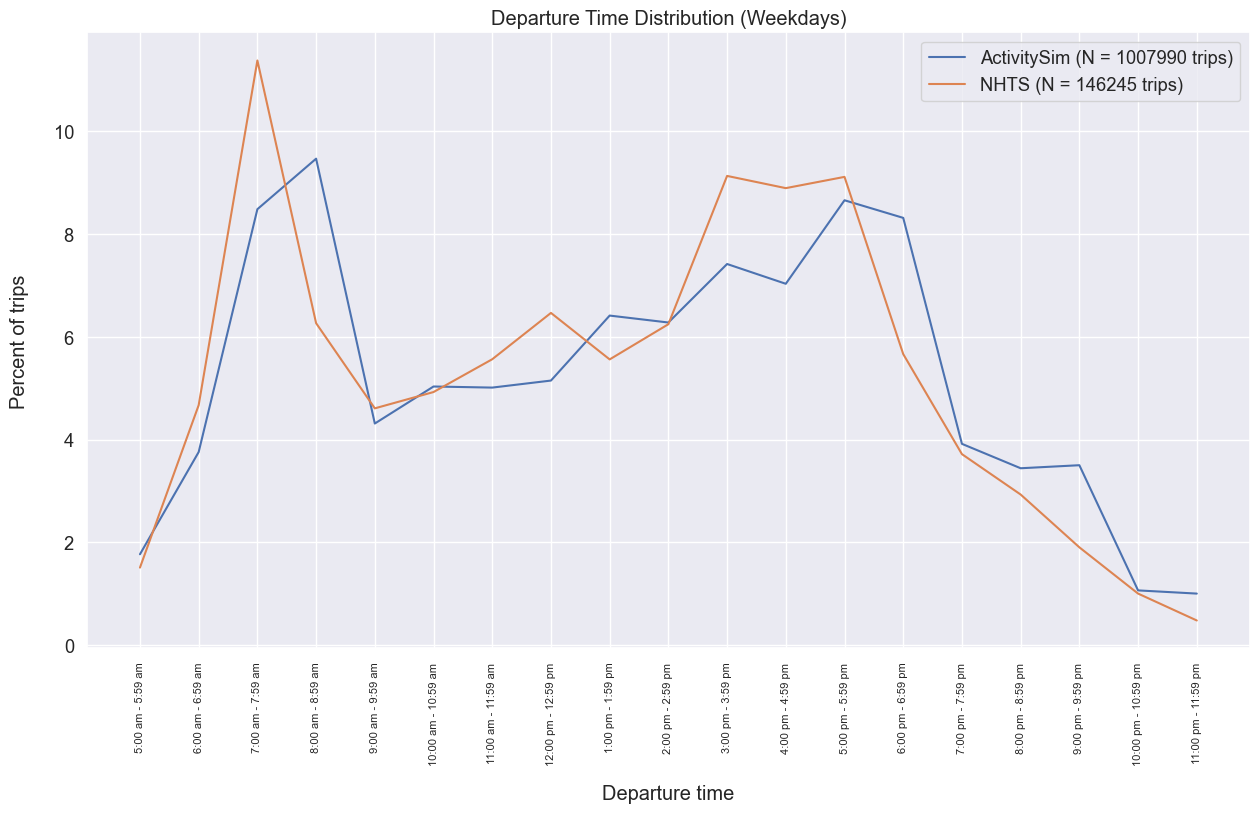

In [143]:
plot_deptime = merged_depart.plot(x = 'Departure time', kind = 'line', figsize=(15,8))
plot_deptime.legend(legend_deptime)
plot_deptime.xaxis.set_label_coords(0.5, -0.22)
plot_deptime.yaxis.set_label_coords(-0.05, 0.5)
plt.ylabel('Percent of trips')
df_plot.legend(legend_deptime)
plt.xticks(ticks = np.arange(0, 19, step=1), labels = ['5:00 am - 5:59 am', '6:00 am - 6:59 am', '7:00 am - 7:59 am', '8:00 am - 8:59 am', 
                 '9:00 am - 9:59 am', '10:00 am - 10:59 am', '11:00 am - 11:59 am', '12:00 pm - 12:59 pm', 
                 '1:00 pm - 1:59 pm', '2:00 pm - 2:59 pm', '3:00 pm - 3:59 pm', '4:00 pm - 4:59 pm', 
                 '5:00 pm - 5:59 pm', '6:00 pm - 6:59 pm', '7:00 pm - 7:59 pm', '8:00 pm - 8:59 pm', 
                 '9:00 pm - 9:59 pm', '10:00 pm - 10:59 pm', '11:00 pm - 11:59 pm'], fontsize=8, rotation=90)
plt.title('Departure Time Distribution (Weekdays)')
plt.savefig('Plot/Dep_Time_Validation.png', bbox_inches='tight')

In [135]:
#******************************************************************************************************************

In [136]:
#================================================= TRIP PURPOSE =================================================

In [137]:
#----------------------------------------------- NHTS  Trip Purpose -----------------------------------------------

In [144]:
# create a new column 'Purpose' based on values in column 'purpose'
nhts.loc[ nhts['WHYTRP1S'] == 97, 'Purpose' ] = 'Other Discretionary' 
nhts.loc[ nhts['WHYTRP1S'] == 50, 'Purpose' ] = 'Social'
nhts.loc[nhts['WHYTRP1S'] == 1, 'Purpose'] = 'Home'
nhts.loc[nhts['WHYTRP1S'] == 40, 'Purpose'] = 'Shopping'
nhts.loc[nhts['WHYTRP1S'] == 80, 'Purpose'] = 'Eat Out'
nhts.loc[nhts['WHYTRP1S'] == 70, 'Purpose'] = 'Escort'
nhts.loc[nhts['WHYTRP1S'] == 30, 'Purpose'] = 'Other Maintenance'
nhts.loc[nhts['WHYTRP1S'] == 10, 'Purpose'] = 'Work'
nhts.loc[nhts['WHYTRP1S'] == 20, 'Purpose'] = 'School/University'

In [145]:
nhts.Purpose.unique()

array(['Work', 'Shopping', 'Home', 'Social', 'Eat Out', 'Escort',
       'School/University', 'Other Maintenance', 'Other Discretionary'],
      dtype=object)

In [147]:
nhts_purpose = nhts.groupby('Purpose')[['WTTRDFIN']].sum()

In [148]:
nhts_purpose

,WTTRDFIN
Purpose,
Eat Out,1.465311e+09
Escort,1.958923e+09
Home,7.354513e+09
Other Discretionary,4.126118e+08
Other Maintenance,3.906000e+08
School/University,1.524415e+09
Shopping,3.287727e+09
Social,1.664561e+09
Work,3.323616e+09


In [149]:
nhts_purpose_percent = nhts_purpose['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_purpose_percent = nhts_purpose_percent.reset_index()
nhts_purpose_percent

,Purpose,WTTRDFIN
0,Eat Out,6.852923
1,Escort,9.161432
2,Home,34.395366
3,Other Discretionary,1.929691
4,Other Maintenance,1.826747
5,School/University,7.129339
6,Shopping,15.375946
7,Social,7.784769
8,Work,15.543788


In [150]:
#------------------------------------------- ActivitySim Trip Purpose -------------------------------------------

In [151]:
actSim.purpose.unique()

array(['work', 'othmaint', 'Home', 'eatout', 'atwork', 'Work', 'othdiscr',
       'escort', 'school', 'shopping', 'social', 'univ'], dtype=object)

In [152]:
# Create a new column 'Purpose' based on values in column 'purpose'
conditions = [
    actSim['purpose'].isin(['work','atwork', 'Work']),
    actSim['purpose'].isin(['school', 'univ']),
    actSim['purpose'] == 'othdiscr',
    actSim['purpose'] == 'social',
    actSim['purpose'] == 'Home',
    actSim['purpose'] == 'shopping',
    actSim['purpose'] == 'eatout',
    actSim['purpose'] == 'escort',
    actSim['purpose'] == 'othmaint'
]

values = ['Work', 'School/University', 'Other Discretionary', 'Social', 
          'Home', 'Shopping', 'Eat Out', 'Escort', 'Other Maintenance']
actSim['Purpose'] = np.select(conditions, values)

In [153]:
n_rows_actSim = actSim.shape[0]
n_rows_actSim # 

1007990

In [154]:
actSim_purpose = actSim.groupby('Purpose')[['trip_id']].count()
actSim_purpose.head

<bound method NDFrame.head of                      trip_id
Purpose                     
Eat Out                47017
Escort                 89827
Home                  354895
Other Discretionary    52583
Other Maintenance      58163
School/University      69635
Shopping               93201
Social                 24556
Work                  218113>

In [155]:
# actSim_purpose = actSim.groupby('Purpose')[['trip_id']].count()
# actSim_purpose.columns = ['Trip purpose']
# actSim_purpose = actSim_purpose.reset_index()
actSim_purpose['ActivitySim'] = actSim_purpose['trip_id'].transform(lambda x: x / x.sum() * 100)
actSim_purpose = actSim_purpose.reset_index()

In [156]:
actSim_purpose

,Purpose,trip_id,ActivitySim
0,Eat Out,47017,4.664431
1,Escort,89827,8.911497
2,Home,354895,35.208187
3,Other Discretionary,52583,5.216619
4,Other Maintenance,58163,5.770196
5,School/University,69635,6.908303
6,Shopping,93201,9.246223
7,Social,24556,2.436135
8,Work,218113,21.638409


In [157]:
actSim_purpose = actSim_purpose[['Purpose', 'ActivitySim']]
actSim_purpose

,Purpose,ActivitySim
0,Eat Out,4.664431
1,Escort,8.911497
2,Home,35.208187
3,Other Discretionary,5.216619
4,Other Maintenance,5.770196
5,School/University,6.908303
6,Shopping,9.246223
7,Social,2.436135
8,Work,21.638409


In [164]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [158]:
trip_purp_validation = pd.merge(actSim_purpose,
                                          nhts_purpose_percent,
                                          on = 'Purpose', how = 'left')

In [159]:
trip_purp_validation

,Purpose,ActivitySim,WTTRDFIN
0,Eat Out,4.664431,6.852923
1,Escort,8.911497,9.161432
2,Home,35.208187,34.395366
3,Other Discretionary,5.216619,1.929691
4,Other Maintenance,5.770196,1.826747
5,School/University,6.908303,7.129339
6,Shopping,9.246223,15.375946
7,Social,2.436135,7.784769
8,Work,21.638409,15.543788


In [160]:
trip_purp_validation.to_csv('Summary Table/trip_purp_distribution.csv')

In [161]:
# LEGEND for the plot
ActSim_legend_purp = 'ActivitySim (N = ' + str(actSim.shape[0]) + ' ' + 'trips)'
nhts_legend_purp = 'NHTS (N = ' + str(nhts.shape[0]) + ' ' + 'trips)'
legend_purp = [ActSim_legend_purp, nhts_legend_purp]

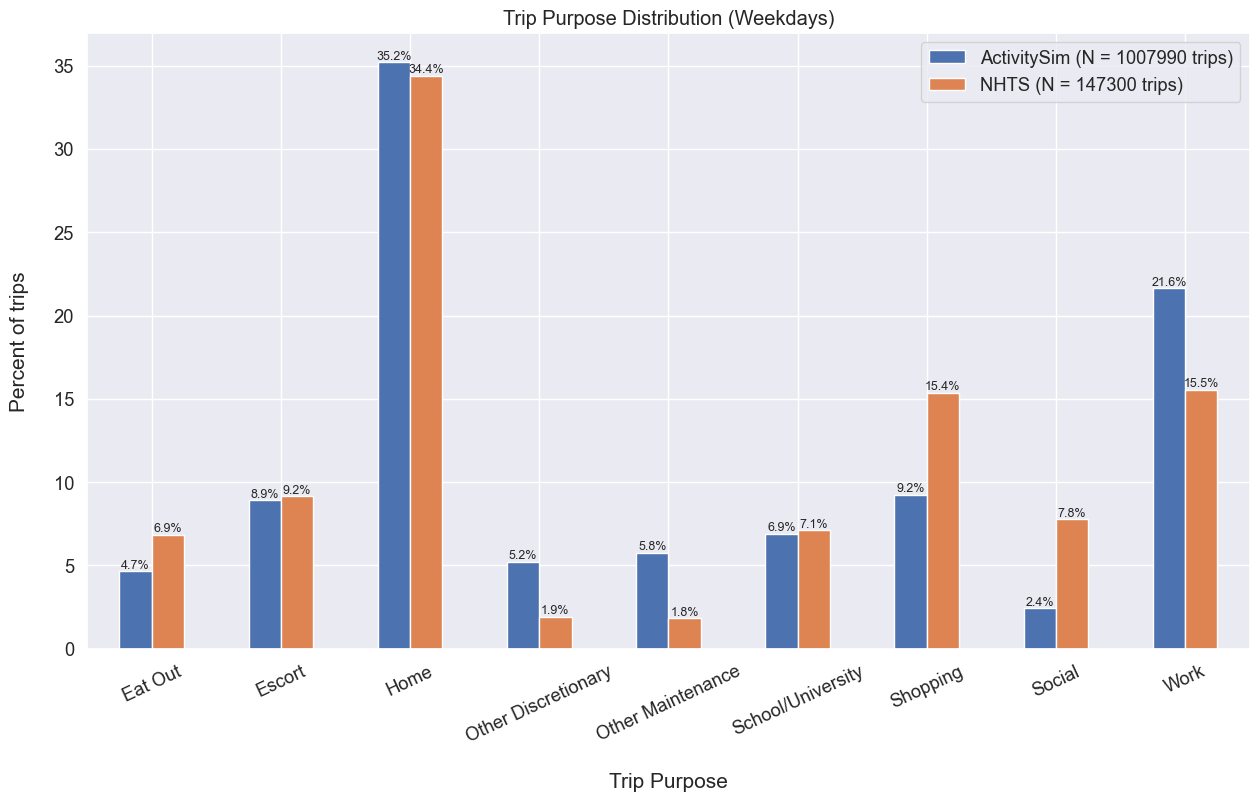

In [162]:
# Plot
df = trip_purp_validation
df_plot = df.plot('Purpose', kind = 'bar', figsize=(15,8)) # , figsize=(15,4) , width=1
for p in df_plot.containers:
    df_plot.bar_label(p, fmt='%.1f%%', label_type='edge', fontsize = 9)
    df_plot.xaxis.set_label_coords(0.5, -0.2)
    df_plot.yaxis.set_label_coords(-0.05, 0.5)
    df_plot.legend(legend_purp)
plt.xlabel('Trip Purpose', fontsize = 15)
plt.ylabel('Percent of trips', fontsize = 15)
plt.xticks(rotation = 25)
plt.title('Trip Purpose Distribution (Weekdays)')
plt.savefig('Plot/Trip_Purp_Validation.png', dpi = 200, bbox_inches = 'tight') # plt.savefig(plotname, dpi = 200, bbox_inches = 'tight')
plt.show()